In [ ]:
pip install psycopg2

In [4]:
import pandas as pd
import numpy as np
import psycopg2
import csv
import sqlalchemy
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from textblob import TextBlob
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
link = psycopg2.connect(database="DVDRental", user="postgres", password="Petiwala34", host="127.0.0.1", port=5432)


f = open('C:/Users/Astrophysics & Code/Desktop/Academic Activities/UCF MS Data Analytics/SQLPractice/Official Film Dataset/film.csv', 'w')

#listOfItems[]
#count = 0
    
cur= link.cursor()
    
#Follow through with the query


#cur.execute("Select film_id, title, rating, rental_rate from film")    

cur.execute('Select * from film')

names = [desc[0] for desc in cur.description]


while True:
    #Read the data
    df = pd.DataFrame(cur.fetchall())
    
    #We are done if there are no data
    if len(df) == 0:
        break
    
    #Let us write to the file
    else:
        df.to_csv(f, header = names)

#rows = cur.fetchall()
    
    
#for each in rows:
#    print(f" {each[0]} {each[1]} {each[2]} {each[3]}")
    #cur.execute
    

    
#Close cursor    
cur.close()    
    
    
#Close the connection
link.close()
    


In [6]:
df = pd.read_csv('film.csv')

In [7]:
df.head()

,Unnamed: 0,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,['Trailers'],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,['Behind the Scenes'],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,['Trailers'],'airport':1 'ancient':18 'confront':14 'epic':...
3,3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,['Trailers'],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"['Deleted Scenes', 'Behind the Scenes']",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [8]:
df.describe()


,Unnamed: 0,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost
count,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,500.500000,2006.0,1.0,4.985000,2.980000,115.272000,19.984000
std,288.819436,288.819436,0.0,0.0,1.411654,1.646393,40.426332,6.050833
min,0.000000,1.000000,2006.0,1.0,3.000000,0.990000,46.000000,9.990000
25%,249.750000,250.750000,2006.0,1.0,4.000000,0.990000,80.000000,14.990000
50%,499.500000,500.500000,2006.0,1.0,5.000000,2.990000,114.000000,19.990000
75%,749.250000,750.250000,2006.0,1.0,6.000000,4.990000,149.250000,24.990000
max,999.000000,1000.000000,2006.0,1.0,7.000000,4.990000,185.000000,29.990000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
Unnamed: 0          1000 non-null int64
film_id             1000 non-null int64
title               1000 non-null object
description         1000 non-null object
release_year        1000 non-null int64
language_id         1000 non-null int64
rental_duration     1000 non-null int64
rental_rate         1000 non-null float64
length              1000 non-null int64
replacement_cost    1000 non-null float64
rating              1000 non-null object
last_update         1000 non-null object
special_features    1000 non-null object
fulltext            1000 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 109.5+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'film_id', 'title', 'description', 'release_year',
       'language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'last_update', 'special_features',
       'fulltext'],
      dtype='object')

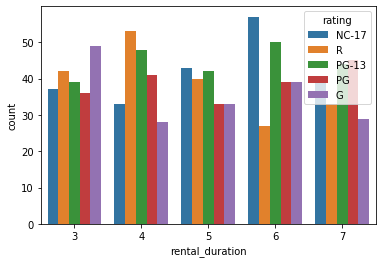

In [11]:
#Data insight
#Compare
sns.countplot(x="rental_duration", data=df, hue="rating")

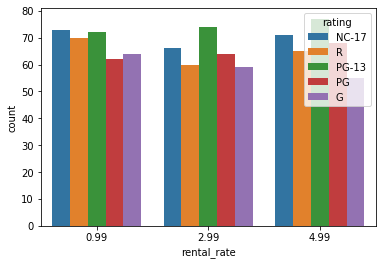

In [12]:
sns.countplot(x="rental_rate", data=df, hue="rating")

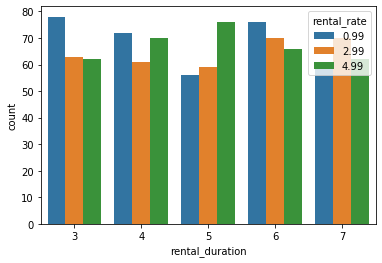

In [13]:
sns.countplot(x="rental_duration", data=df, hue="rental_rate")

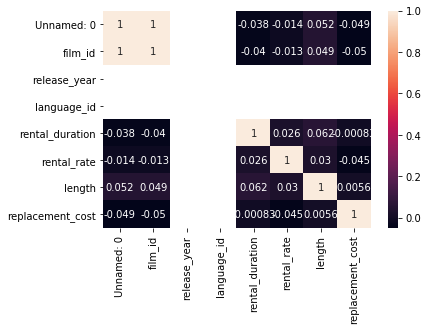

In [14]:
sns.heatmap(df.corr(), annot = True)
#plt.show()

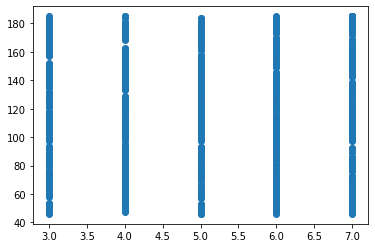

In [15]:
plt.scatter(df['rental_duration'],df['length'])
plt.show()

In [16]:
kClusters = KMeans(n_clusters = 2)
kClusters


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
expectation = kClusters.fit_predict(df[['rental_duration','length']])
expectation

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

No handles with labels found to put in legend.


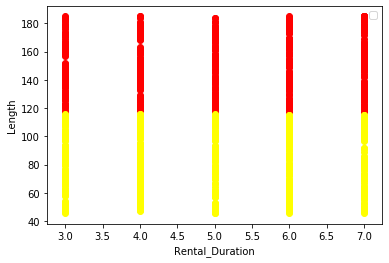

In [18]:
df['result'] = expectation

part1 = df[df.result==0]
part2 = df[df.result==1]



plt.scatter(part1.rental_duration,part1['length'],color='red')
plt.scatter(part2.rental_duration,part2['length'],color='yellow')

plt.xlabel('Rental_Duration')
plt.ylabel('Length')
plt.legend()


[1634644.791, 421244.2980682615, 184100.323324471, 107402.99457245287, 65737.42474565457, 45308.05862363105, 34313.31463898391, 26677.749862521272, 21739.21526399323, 17936.469859840898, 14809.88375949929, 12487.421497139852, 10923.256573972274, 9749.329764421287]


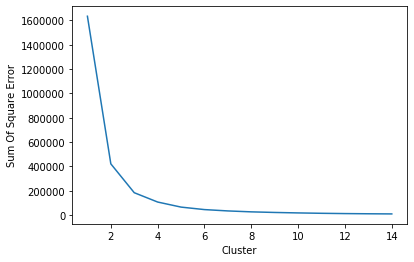

In [19]:
#Elbow plot construction

listDo = range(1,15)
totalFlaw = []

for each_cluster in listDo:
    clustering2 = KMeans(n_clusters=each_cluster)
    clustering2.fit(df[["rental_duration","length"]])
    
    #Renders the sum of square error
    totalFlaw.append(clustering2.inertia_)

print(totalFlaw)

plt.xlabel("Cluster")
plt.ylabel("Sum Of Square Error")
plt.plot(listDo,totalFlaw)

In [20]:
df['description']

0      A Fateful Reflection of a Moose And a Husband ...
1      A Epic Drama of a Cat And a Explorer who must ...
2      A Epic Tale of a Moose And a Girl who must Con...
3      A Fateful Yarn of a Lumberjack And a Feminist ...
4      A Epic Drama of a Feminist And a Mad Scientist...
5      A Astounding Epistle of a Database Administrat...
6      A Astounding Reflection of a Lumberjack And a ...
7      A Fanciful Documentary of a Frisbee And a Lumb...
8      A Fast-Paced Documentary of a Pastry Chef And ...
9      A Intrepid Panorama of a Robot And a Boy who m...
10     A Touching Saga of a Hunter And a Butler who m...
11     A Thoughtful Panorama of a Database Administra...
12     A Action-Packed Tale of a Man And a Lumberjack...
13     A Boring Epistle of a Butler And a Cat who mus...
14     A Fanciful Saga of a Hunter And a Pastry Chef ...
15     A Touching Saga of a Composer And a Moose who ...
16     A Action-Packed Drama of a Dentist And a Croco...
17     A Emotional Drama of a A

In [21]:
import pandas as pd
df = pd.read_csv('film.csv')
df.columns = ['Unnamed: 0', 'film_id', 'title', 'description', 'release_year',
       'language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'last_update', 'special_features',
       'fulltext']

X = df.drop(['Unnamed: 0', 'film_id', 'title', 'description', 'last_update', 'special_features', 'rating'], axis=1)
Y = df.rating

In [22]:
#After seeing which variables, when removed, imporved accuracy, they were collectively removed in an ultimate test.
X = df.drop(['Unnamed: 0', 'film_id', 'title', 'description', 'last_update', 'special_features', 'rating', 'fulltext'], axis=1)
Y = df.rating
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=12340)
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
model.score(x_test, y_test)
y_pred = model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[14 21 10  7 14]
 [ 6 23 16 19  9]
 [ 9 19 11 20 10]
 [15 15 17 19 16]
 [ 6 19 16  8 11]]
Accuracy: 0.22285714285714286


In [23]:
samples = df["description"]

x = []
y = []

polarity = 0
subject = 0

for item in samples:
    
    snip = TextBlob(item)
    current = snip.sentiment
    
    print(current)
    
   
    for value in current:
        polarity = snip.sentiment.polarity
        x.append(polarity)
            
        subject = snip.sentiment.subjectivity
        y.append(subject)


Sentiment(polarity=-0.05, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.025, subjectivity=0.2)
Sentiment(polarity=-0.1, subjectivity=0.2)
Sentiment(polarity=-0.2625, subjectivity=0.7)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=-0.025, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.2833333333333333, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.65)
Sentiment(polarity=0.1375, subjectivity=1.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0

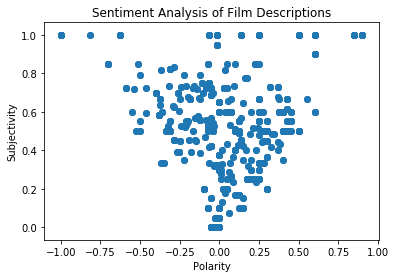

In [24]:
plt.scatter(x,y)
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.title("Sentiment Analysis of Film Descriptions")
plt.show()

Text(0.5, 1.0, 'Polarity')

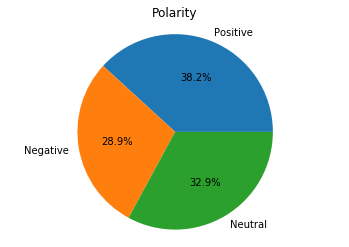

In [25]:
label_one = 'Positive', 'Negative', 'Neutral'

size_one = 0
size_two = 0
size_three = 0

for x_values in x:
    
    #Positive Polarity
    if (x_values > 0 and x_values <= 1):
        size_one += 1
    
    #Negative Polarity    
    elif (x_values < 0 and x_values >= -1):
        size_two += 1

   #Neutral Polarity    
    elif (x_values == 0.0):
        size_three += 1
        
        
sizes_polarity = [size_one, size_two, size_three]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_polarity, labels = label_one, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Polarity")


Text(0.5, 1.0, 'Subjectivity')

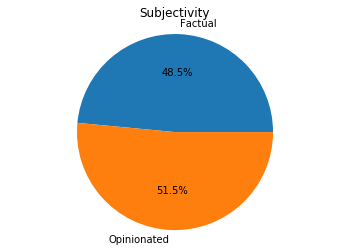

In [26]:
label_two = 'Factual', 'Opinionated'

size_one = 0
size_two = 0

for y_values in y:
    
    #Tending Towards Public Opinion
    if (y_values >= 0.5 and y_values <= 1):
        size_one += 1
    
    #Tending Towards Factual Information    
    elif (y_values >= 0 and y_values <= 0.5):
        size_two += 1

        
        
sizes_subject = [size_one, size_two]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_subject, labels = label_two, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Subjectivity")



Text(0.5, 1.0, 'Complete Comparisons')

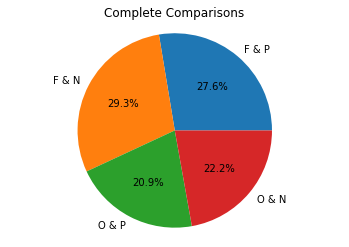

In [29]:
labels_general = "F & P", "F & N", "O & P", "O & N"

size_one = 0
size_two = 0
size_three = 0
size_four = 0

for x_values in x: 
    for y_values in y:
        #Positive Polarity and Opinion
        if (x_values > 0 and x_values <= 1 and y_values >= 0.5 and y_values <= 1):
            size_one += 1
        
        #Positive Polarity and Factual Information
        elif (x_values > 0 and x_values <= 1 and y_values >= 0 and y_values <= 0.5):
            size_two += 1
        
        #Negative Polarity and Opinion    
        elif (x_values < 0 and x_values >= -1 and y_values >= 0.5 and y_values <= 1):
            size_three += 1
        
        #Negative Polarity and Factual Information
        elif (x_values < 0 and x_values >= -1 and y_values >= 0 and y_values <= 0.5):
            size_four += 1

        
sizes_complete = [size_one, size_two, size_three, size_four]

figure1, ax1 = plt.subplots()
ax1.pie(sizes_complete, labels = labels_general, autopct='%1.1f%%')

ax1.axis("equal")

plt.title("Complete Comparisons")
    